# NMEA 0183 Data Parser with Python Pandas

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import matplotlib.pyplot as plt

In [2]:
%pylab inline --no-import-all
#%matplotlib notebook
#%matplotlib qt

Populating the interactive namespace from numpy and matplotlib


## Read Logfile

In [28]:
fto = 'DATALOG2.TXT' #  File to Open
l=[]
l.extend(range(0,22))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*')
df.drop(df[df[0]=='$GPTXT'].index, inplace=True) # Remove unused sentences
df.drop(df[df[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)

# Convert strings to numbers
df = df.apply(pd.to_numeric, errors='ignore')

## Concatenate GGA and GSV lines to one table

In [29]:
df1 = df.loc[df[0]=='$GPGGA'] # Parse GGA sentences
df2 = df.loc[df[2]==1]   # Parse GSV sentences
df3 = df.loc[df[2]==2]
df4 = df.loc[df[2]==3]
df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()
df4 = df4.reset_index()
df5 = pd.concat([df1,df2,df3,df4], axis=1,  ignore_index=True)
# Convert NMEA time to pandas time
df5[2] = pd.to_datetime(df5[2], format='%H%M%S.%f').dt.time
#df5=df5.rename(columns = {2:'time'})#

## Filter minimal elevation

In [30]:
MINELEV = 20
#df5[29][df5[27]<MINELEV] = 0
#df['FirstName'][df.ID == 103] = "Matt"
df5[df5[27] < MINELEV]

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91


## Calculate average SNR

In [31]:
df5['avgsnr'] = df5[range(29,42,4) + range(50,63,4) + range(71,84,4)].mean(axis=1)
#df5.ix[10][22:]


## Plot SNR

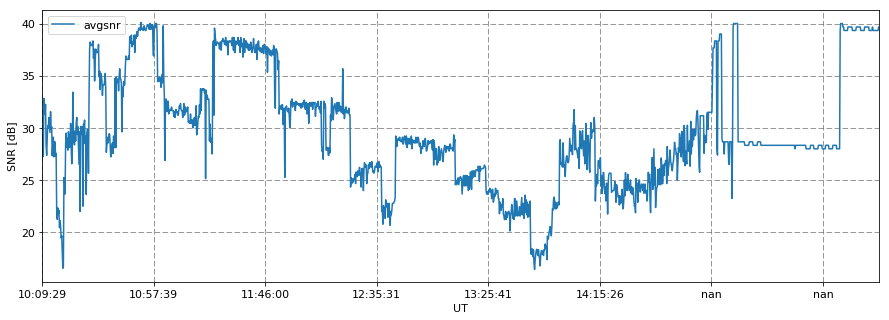

In [53]:
matplotlib.rcParams.update({'font.size': 11})


df5.plot(x=2,y='avgsnr',figsize=(15,5))#,xticks=['10:30:00','11:00:00','11:30:00','12:00:00','12:30:00','13:00:00'])
plt.grid(b=True, which='major', color='grey', linestyle='--')
#plt.grid(b=True, which='minor', color='grey', linestyle='-')
plt.xlabel('UT')
plt.ylabel('SNR [dB]')

In [32]:
df = pd.DataFrame([[1,1,1,2,2],[1,2,3,4,5],[1,2,3,3,5]])
print df
print df[df[1]==2].sum(axis=1)
print df[df[1]==2][[3,4]].sum(axis=1)
print df[df[1]==2].count()[3]


   0  1  2  3  4
0  1  1  1  2  2
1  1  2  3  4  5
2  1  2  3  3  5
1    15
2    14
dtype: int64
1    9
2    8
dtype: int64
2


          0       1         2           3    4           5    6    7    8  \
0       2.0  $GPGGA  10:09:29         NaN  NaN         NaN  NaN  0.0  0.0   
1       9.0  $GPGGA  10:09:30         NaN  NaN         NaN  NaN  0.0  0.0   
2      16.0  $GPGGA  10:09:44         NaN  NaN         NaN  NaN  0.0  0.0   
3      26.0  $GPGGA  10:09:58         NaN  NaN         NaN  NaN  0.0  4.0   
4      33.0  $GPGGA  10:10:12  5301.62081    N  1837.64690    E  1.0  6.0   
5      42.0  $GPGGA  10:10:27  5301.62141    N  1837.65152    E  1.0  6.0   
6      54.0  $GPGGA  10:10:42  5301.62196    N  1837.64803    E  1.0  6.0   
7      66.0  $GPGGA  10:10:57  5301.62134    N  1837.64756    E  1.0  6.0   
8      72.0  $GPGGA  10:11:11  5301.62222    N  1837.64671    E  1.0  6.0   
9      84.0  $GPGGA  10:11:26  5301.62215    N  1837.64698    E  1.0  6.0   
10     96.0  $GPGGA  10:11:41  5301.62259    N  1837.64640    E  1.0  8.0   
11    102.0  $GPGGA  10:11:55  5301.62250    N  1837.64713    E  1.0  8.0   

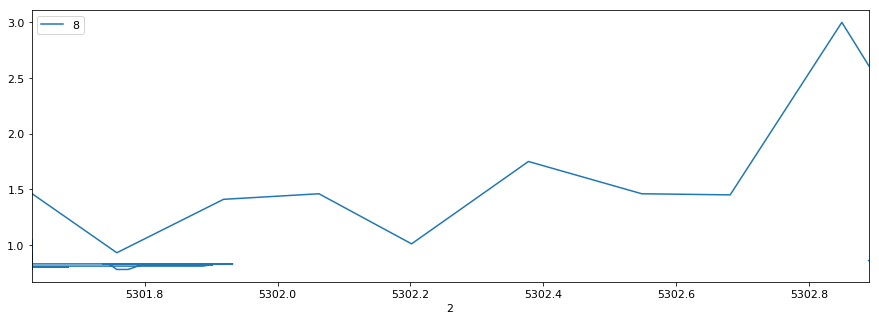

In [71]:
print df5
#dfx = df5.loc[df[0]=='$GPGGA']
dfx[100:1000].plot(x=2,y=8,figsize=(15,5))